<a href="https://colab.research.google.com/github/DannyRavi/letter_map_encryption/blob/main/mapLettersEncrypted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  این قسمت مربوط به کتابخانه‌های اصلی و متغیرهای عمومی و آدرس فایل‌های اصلی جهت خواندن فایل پیام و نوشتن پیام رمز شده هست. توجه کنید که الگوریتم اجرا شده در این کد بر اساس  رمز سزار یا شیفت دادن حروف نیست، در واقع هر حرف با حرف دیگری به صورت تصادفی و نظیر به نظیر نگاشت شده است. همینطور اعداد و مواردی غیر از ۲۶ حروف الفبای انگلیسی رمز گذاری نمی‌شود.

## input file for plaintexts are base on http://textfiles.com/stories/

In [ ]:
from string import ascii_lowercase
from math import fmod
import random
import pandas as pd
import matplotlib.pyplot as plt
# plt.close("all")
plt.rcParams['figure.figsize'] = [12, 12]

text_url = "./text.txt"
cipher_url = "./cipher.txt"
alphabet = list(ascii_lowercase)
alphabetRandom = alphabet.copy()
# frequencies are frequency analysis in leeter of english language
# for more detail see those: https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/English_letter_frequency_%28alphabetic%29.svg/340px-English_letter_frequency_%28alphabetic%29.svg.png
# https://en.wikipedia.org/wiki/Frequency_analysis
frequencies = {
    "a": 0.0817,
    "b": 0.0149,
    "c": 0.0278,
    "d": 0.0425,
    "e": 0.127,
    "f": 0.0229,
    "g": 0.0202,
    "h": 0.0609,
    "i": 0.0697,
    "j": 0.0015,
    "k": 0.0077,
    "l": 0.0403,
    "m": 0.0241,
    "n": 0.0675,
    "o": 0.0751,
    "p": 0.0193,
    "q": 0.001,
    "r": 0.0599,
    "s": 0.0633,
    "t": 0.0906,
    "u": 0.0276,
    "v": 0.0098,
    "w": 0.0236,
    "x": 0.0015,
    "y": 0.0197,
    "z": 0.0007
}

### some function for read plaintext from txt file (text.txt) and wrtie function for write ciphertext to cipher.txt

In [ ]:
def read_file(file):
    with open(file) as f:
        text = ""
        for line in f.readlines():
            text += line.lower()
    return str(text)


def write_file(file, text: str):
    with open(file, "w+") as f:
        f.writelines(text.splitlines(keepends=True))



### this is heart of 3ncodeing I used to "randon.shuffle" to manipulate alphabet list. this is absoulote randomly for any execution.
### this block return a dataframe aka "df" that contain  plaintext_letter and map of letter than known by map_letter in header of dataframe.

In [ ]:
random.shuffle(alphabetRandom)
mou_dic = {'plaintext_letter':alphabet,'map_letter':alphabetRandom}
df =  pd.DataFrame(mou_dic,columns=['plaintext_letter','map_letter'])
df


,plaintext_letter,map_letter
0,a,s
1,b,g
2,c,i
3,d,f
4,e,z
5,f,w
6,g,t
7,h,y
8,i,r
9,j,a


### This block can read the input file (plaintext) and show the number of letters and the percentage of text length to the number of letters as output in the table below as output. they are kind of frequencies analysis.

In [ ]:
real_text = read_file(text_url)
freq_encrypt = []
freq_sign    = []
storeAfter   = []
for letter in real_text:
    if not letter in storeAfter:
        storeAfter.append(letter)
        if letter in alphabet:
            freq_sign.append(letter)
            freq_encrypt.append(real_text.count(letter)/len(real_text))
freqPrecent = {'letter_plaintext':freq_sign,'precentage_plainText':freq_encrypt}
df_plainText = pd.DataFrame(freqPrecent,columns=['letter_plaintext','precentage_plainText'])
df_plainText = df_plainText.sort_values('letter_plaintext')
df_plainText


,letter_plaintext,precentage_plainText
4,a,0.058895
12,b,0.010841
11,c,0.019385
17,d,0.032569
8,e,0.087919
21,f,0.015324
13,g,0.016747
1,h,0.043409
2,i,0.052404
23,j,0.001262


### This block can read the input file and encrypt the input text with the help of the non-shift displacement hash function and save the result in file 3. Also show part of the encrypted message.

In [ ]:
encrypted_text = read_file(text_url)
print("max letters in input file ==> ",len(encrypted_text))
replace_store = []
for letter in encrypted_text:
    if not letter in replace_store:
        replace_store.append(letter)
        if letter in alphabet:
            find_index = alphabet.index(letter)
            plaintext = str(alphabet[find_index])
            myKey =  str(alphabetRandom[find_index].upper())
            encrypted_text = encrypted_text.replace(plaintext,myKey)
print(encrypted_text)
write_file(cipher_url, encrypted_text)

max letters in input file ==>  148978
VYRE RE S BONZJ UYRIY RE GZRBT KSXPZVZF ZJZIVXOBRISJJH CERBT S
IOBIZDV ERKRJSX VO EYSXZUSXZ. VYSV RE, RW HOC JRPZ VYRE BONZJ, HOC
ISB EZBF $5.00, SJOBT URVY HOCX BSKZ SBF SFFXZEE VO:

BZU YREVOXH GOOPE
I/O WSXGZX
190 CBROB EVXZZV
DOCTYPZZDERZ, BH 12601

GH XZTREVZXRBT RB VYRE USH, HOC URJJ GZ RBWOXKZF OW SBH DCGJRISVROB
BZUE IOBIZXBRBT GXZSPE SBF VYZ EZLCZJ, BOU RB VYZ UOXPE, GXZSPE2.
HOC URJJ SJEO XZIZRNZ S WOCX-REECZ ECGEIXRDVROB VO BZU YREVOXH, VYZ
AOCXBSJ OW ICJVCXZ RB WZXKZBV.

RW HOC UOCJF DXZWZX XZSFRBT VYRE RB VYZ DXZ-ZJZIVXOBRI WOXKSV, EZBF
$17.00 WOX S BRIZJH VHDZEZV IODH, 8.5M11, EDRXSJ GOCBF, URVY
JSKRBSVZF, WCJJ IOJOX IONZXE, ERTBZF SBF BCKGZXZF JRKRVZF ZFRVROB.

EOKZ UOXF DXOIZEEOXE RBEZXV S ACEVRWRISVROB IOFZ SV VYZ VOD OW S
VZMV WRJZ. RW VYZ WOXKSV JOOPE EIXZUH OB HOCX EIXZZB, HOC KSH BZZF
VO FZJZVZ VYSV IOFZ. CBWOXVCBSVZJH, VYZXZ RE BO USH DXZEZXNZ EOKZ
OW VYZ RVSJRIE SBF OVYZX WOXKSVVRBT UYRIY RE S DSXV OW VYZ BONZJ. 

ZBAOH!
GXZ

## This block can read the encrypted message and show the result of frequency analysis of the letters in its text as output.

In [ ]:
freq_encrypt = []
freq_sign    = []
storeAfter   = []
for letter in encrypted_text:
    if not letter in storeAfter:
        storeAfter.append(letter)
        letter = letter.lower()
        if letter in alphabetRandom:
            freq_sign.append(letter)
            freq_encrypt.append(encrypted_text.count(letter.upper())/len(encrypted_text))
freqPrecent = {'letter_in_cipher':freq_sign,'precentage_letter_cipher':freq_encrypt}
df_encrypted =  pd.DataFrame(freqPrecent,columns=['letter_in_cipher','precentage_letter_cipher'])
df_encrypted = df_encrypted.sort_values('letter_in_cipher')
df_encrypted 

,letter_in_cipher,precentage_letter_cipher
23,a,0.001262
5,b,0.051739
19,c,0.022366
20,d,0.012821
3,e,0.044846
17,f,0.032569
12,g,0.010841
18,h,0.014358
11,i,0.019385
9,j,0.030723


### This block shows the frequency analysis diagram of letters in 3 modes of encrypted message and incoming message and frequency analysis of texts in English.

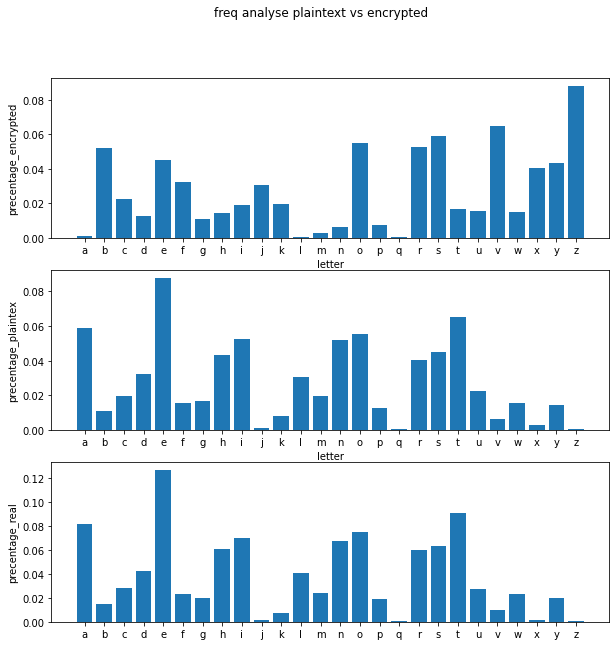

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.suptitle('freq analyse plaintext vs encrypted')

ax1.bar(df_encrypted['letter_in_cipher'],df_encrypted['precentage_letter_cipher'])
ax1.set_xlabel('letter')
ax1.set_ylabel('precentage_encrypted')

ax2.bar(df_plainText['letter_plaintext'],df_plainText['precentage_plainText'])
ax2.set_xlabel('letter')
ax2.set_ylabel('precentage_plaintex')

ax3.bar(frequencies.keys(),frequencies.values())
ax3.set_ylabel('precentage_real')


plt.show()


## Finally, in this block, by analyzing the frequency analysis of the letters in the input text and the encrypted text, we can decode the mapping of the letters from the original text to the encrypted text.

In [ ]:
dfLast = pd.concat([df_plainText,df_encrypted],axis=1)
dfLast
# dfLast[['letter_plaintext','letter_in_cipher']]

,letter_plaintext,precentage_plainText,letter_in_cipher,precentage_letter_cipher
0,t,0.064983,v,0.064983
1,h,0.043409,y,0.043409
2,i,0.052404,r,0.052404
3,s,0.044846,e,0.044846
4,a,0.058895,s,0.058895
5,n,0.051739,b,0.051739
6,o,0.055176,o,0.055176
7,v,0.006296,n,0.006296
8,e,0.087919,z,0.087919
9,l,0.030723,j,0.030723
